In [1]:
import numpy as np
import matplotlib.pyplot as plt
import csv
import pandas as pd
import scipy.stats as sci
import statistics as stt

In [2]:
csv_filename = '/home/roboticslab/Robotology/Repos/allostractor/data/dynamicEnv/staticQ_Inh/1.csv'
data = pd.read_csv(csv_filename)

In [3]:
print('Number of columns = ' + str(data.shape[1]))
print('Number of rows = ' + str(data.shape[0]))

Number of columns = 10
Number of rows = 100000


In [4]:
Xpose = data['Xposition'].to_list()
Ypose = data['Yposition'].to_list()

aV_Temperature = data['aVtemperature'].to_list()
aV_Thirst = data['aVthirst'].to_list()

Drive_Temperature = data['DriveTemp'].to_list()
Drive_Thirst = data['DriveThirst'].to_list()

TF_Temperature = data['TFtemperature'].to_list()
TF_Thirst = data['TFthirst'].to_list()

attrator_Q = data['attractorQ'].to_list()

# aV, Drive and Q analysis per period

In [5]:
periods = 5
period_len = data.shape[0]/5
period_limits = []
for i in range(periods+1):
    period_limits.append(int(period_len*i))
period_limits

[0, 20000, 40000, 60000, 80000, 100000]

In [6]:
print('Average Temperature aV = ' + str(stt.mean(aV_Temperature)))
print('Average Temperature Drive = ' + str(stt.mean(Drive_Temperature)))
print()
print('Average Thirst aV = ' + str(stt.mean(aV_Thirst)))
print('Average Thrist Drive = ' + str(stt.mean(Drive_Thirst)))

Average Temperature aV = 0.6457339975000332
Average Temperature Drive = -2.3155748800000318

Average Thirst aV = 0.6654699675000476
Average Thrist Drive = -2.3351064975000457


In [7]:
aVTempMean_period = []
DTempMean_period = []
aVThirstMean_period = []
DThirstMean_period = []
QMean_period = []
for i in range(periods):
    aVTempMean_period.append(round(stt.mean(aV_Temperature[period_limits[i]:period_limits[i+1]]),4))
    DTempMean_period.append(round(stt.mean(Drive_Temperature[period_limits[i]:period_limits[i+1]]),3))
    aVThirstMean_period.append(round(stt.mean(aV_Thirst[period_limits[i]:period_limits[i+1]]),4))
    DThirstMean_period.append(round(stt.mean(Drive_Thirst[period_limits[i]:period_limits[i+1]]),4))
    QMean_period.append(round(stt.mean(attrator_Q[period_limits[i]:period_limits[i+1]]),4))
    
    print("Mean Temperature aV in period " + str(i+1) + " = " + str(aVTempMean_period[i]))
    print("Mean Temperature Drive in period " + str(i+1) + " = " + str(DTempMean_period[i]))
    print("Mean Thirst aV in period " + str(i+1) + " = " + str(aVThirstMean_period[i]))
    print("Mean Thirst Drive in period " + str(i+1) + " = " + str(DThirstMean_period[i]))
    print("Mean attractor Q in period " + str(i+1) + " = " + str(QMean_period[i]))
    print()

Mean Temperature aV in period 1 = 0.8533
Mean Temperature Drive in period 1 = -4.659
Mean Thirst aV in period 1 = 0.8
Mean Thirst Drive in period 1 = -4.6165
Mean attractor Q in period 1 = 0.5

Mean Temperature aV in period 2 = 0.7363
Mean Temperature Drive in period 2 = -2.511
Mean Thirst aV in period 2 = 0.7329
Mean Thirst Drive in period 2 = -2.4981
Mean attractor Q in period 2 = 0.5

Mean Temperature aV in period 3 = 0.6612
Mean Temperature Drive in period 3 = -2.223
Mean Thirst aV in period 3 = 0.5963
Mean Thirst Drive in period 3 = -2.1784
Mean attractor Q in period 3 = 0.5

Mean Temperature aV in period 4 = 0.4784
Mean Temperature Drive in period 4 = -0.931
Mean Thirst aV in period 4 = 0.6225
Mean Thirst Drive in period 4 = -1.0561
Mean attractor Q in period 4 = 0.5

Mean Temperature aV in period 5 = 0.4995
Mean Temperature Drive in period 5 = -1.254
Mean Thirst aV in period 5 = 0.5757
Mean Thirst Drive in period 5 = -1.3265
Mean attractor Q in period 5 = 0.5



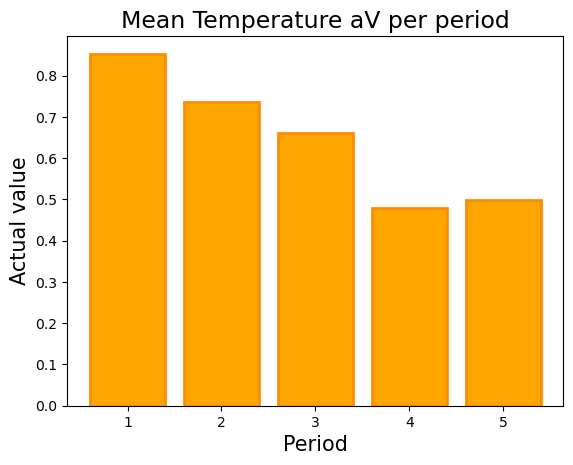

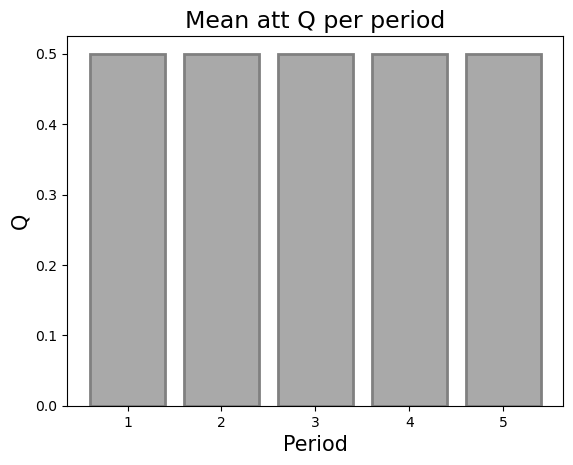

In [8]:
x = [1,2,3,4,5]
plt.title('Mean Temperature aV per period', fontsize=17)
plt.ylabel('Actual value', fontsize=15)
plt.xlabel('Period', fontsize=15)
plt.bar(x, aVTempMean_period, color='orange',edgecolor='darkorange', linewidth=2)
plt.show()

plt.title('Mean Thirst aV per period', fontsize=17)
plt.ylabel('Actual value', fontsize=15)
plt.xlabel('Period', fontsize=15)
plt.bar(x, aVThirstMean_period, color = 'cyan', edgecolor='darkcyan', linewidth=2)
plt.show()

plt.title('Mean att Q per period', fontsize=17)
plt.ylabel('Q', fontsize=15)
plt.xlabel('Period', fontsize=15)
plt.bar(x, QMean_period, color='darkgray', edgecolor='gray', linewidth=2)
plt.show()


# Robot trajectory per period

In [9]:
plt.figure(figsize=(10, 10))
plt.plot(Xpose, Ypose, linewidth=0.3)
plt.yticks(np.arange(0, 210, step=25))
plt.xticks(np.arange(0, 210, step=25))
plt.title('Robot trajectory', fontsize=20)
plt.plot(Xpose[0],Ypose[0],'ro')
plt.show()

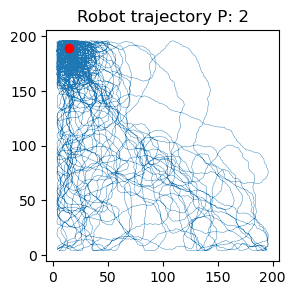

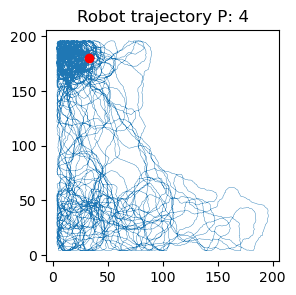

In [10]:
for i in range(5):
    plt.figure(figsize=(3, 3))
    plt.plot(Xpose[period_limits[i]:period_limits[i+1]], Ypose[period_limits[i]:period_limits[i+1]], linewidth=0.3)
    plt.yticks(np.arange(0, 210, step=50))
    plt.xticks(np.arange(0, 210, step=50))
    plt.title('Robot trajectory P: ' + str(i+1), fontsize=12)
    plt.plot(Xpose[period_limits[i]],Ypose[period_limits[i]],'ro')
    plt.show()

# Robot occupancy per period

In [11]:
xy_array = np.column_stack((Xpose, Ypose))
x_array = xy_array[:,0]
y_array = xy_array[:,1]

bins = 10
xedges= []
yedges= []

for i in range(bins):
    xedges.append((max(Xpose)/bins)*i)
    yedges.append((max(Ypose)/bins)*i)
    
xedges.append((max(Xpose)))
yedges.append((max(Ypose)))

fig, ax = plt.subplots(figsize=(7, 6))
ax.set_aspect("equal")
hist, xbins, ybins, im = ax.hist2d(x_array, y_array, bins=(xedges, yedges), vmax=2500)
H = hist.T
H_normalized = H/float(xy_array.shape[0])

for k in range(len(ybins)-1):
    for l in range(len(xbins)-1):
        ax.text(xbins[l]+xedges[1]/2, ybins[k]+yedges[1]/2, round(H_normalized[k,l],2), fontsize=10, ha="center", va="center", color="w", fontweight="bold")
        
ax.set_title('Arena occupancy', fontsize=20)
ax.set_yticks(np.arange(0, 200, step=25))
ax.set_xticks(np.arange(0, 200, step=25))
hist = ax.imshow(H_normalized, origin='lower', extent=[xedges[0], xedges[-1], yedges[0], yedges[-1]])
#cbar = fig.colorbar(hist)
#cbar.set_label('Normal timesteps', rotation=270, fontsize=20, labelpad=+25)

plt.show()

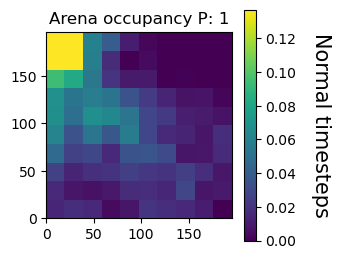

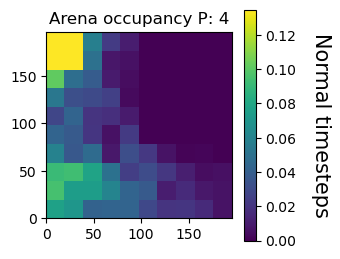

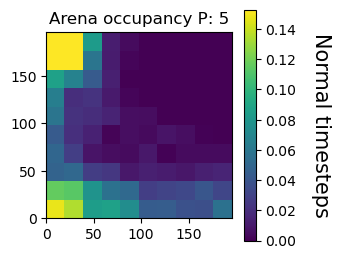

In [12]:
for i in range(5):
    xy_array = np.column_stack((Xpose[period_limits[i]:period_limits[i+1]], Ypose[period_limits[i]:period_limits[i+1]]))
    x_array = xy_array[:,0]
    y_array = xy_array[:,1]

    bins = 10
    xedges= []
    yedges= []

    for j in range(bins):
        xedges.append((max(Xpose)/bins)*j)
        yedges.append((max(Ypose)/bins)*j)

    xedges.append((max(Xpose)))
    yedges.append((max(Ypose)))

    fig, ax = plt.subplots(figsize=(3, 3))
    ax.set_aspect("equal")
    hist, xbins, ybins, im = ax.hist2d(x_array, y_array, bins=(xedges, yedges), vmax=800)
    H = hist.T
    H_normalized = H/float(xy_array.shape[0])

    
    hist = ax.imshow(H_normalized, origin='lower', extent=[xedges[0], xedges[-1], yedges[0], yedges[-1]])
    cbar = fig.colorbar(hist)
    
    #xticks = ax.set_xticks(np.arange(0, 201, step=50))
    #yticks = ax.set_yticks(np.arange(0, 201, step=50))
    cbar.set_label('Normal timesteps', rotation=270, fontsize=15, labelpad=+25)
    ax.set_title('Arena occupancy P: ' + str(i+1), fontsize=12)

    plt.show()

# Actual values analyses per period

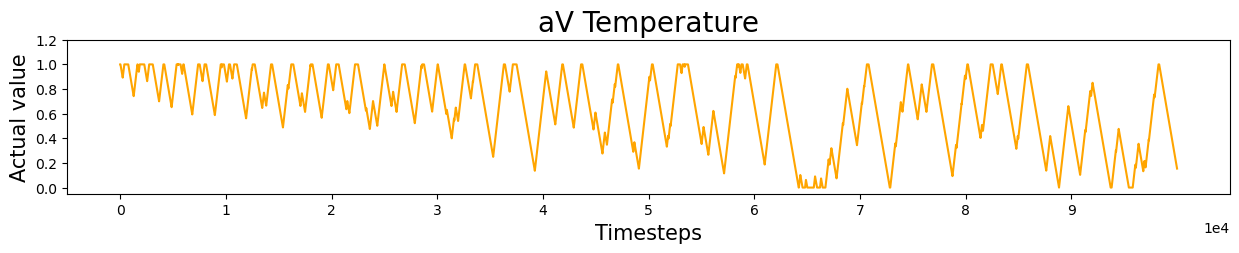

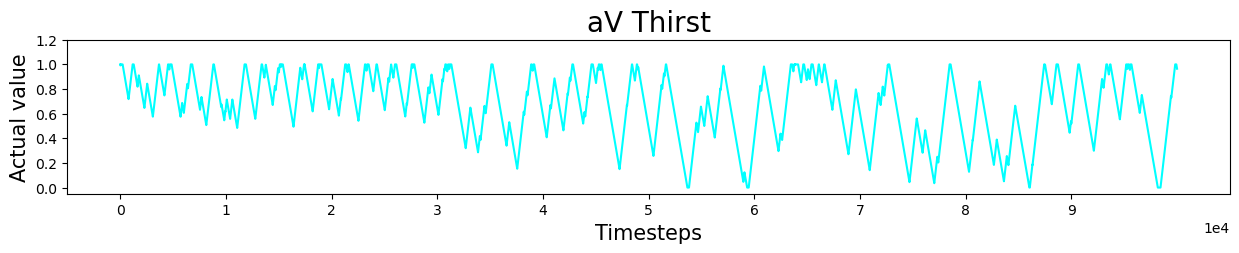

In [13]:
steps = round(period_limits[1]/2, -3)
plt.figure(figsize=(15, 2))
plt.plot(aV_Temperature,'orange')
plt.xticks(np.arange(0, len(aV_Temperature), step=steps))
plt.ticklabel_format(axis="x", style="sci", scilimits=(0,0))
plt.yticks(np.arange(0, 1.3, step=0.2))
plt.title('aV Temperature', fontsize=20)
plt.ylabel('Actual value', fontsize=15)
plt.xlabel('Timesteps', fontsize=15)
plt.show()

plt.figure(figsize=(15, 2))
plt.plot(aV_Thirst,'cyan')
plt.xticks(np.arange(0, len(aV_Thirst), step=steps))
plt.ticklabel_format(axis="x", style="sci", scilimits=(0,0))
plt.yticks(np.arange(0, 1.3, step=0.2))
plt.title('aV Thirst', fontsize=20)
plt.ylabel('Actual value', fontsize=15)
plt.xlabel('Timesteps', fontsize=15)
plt.show()

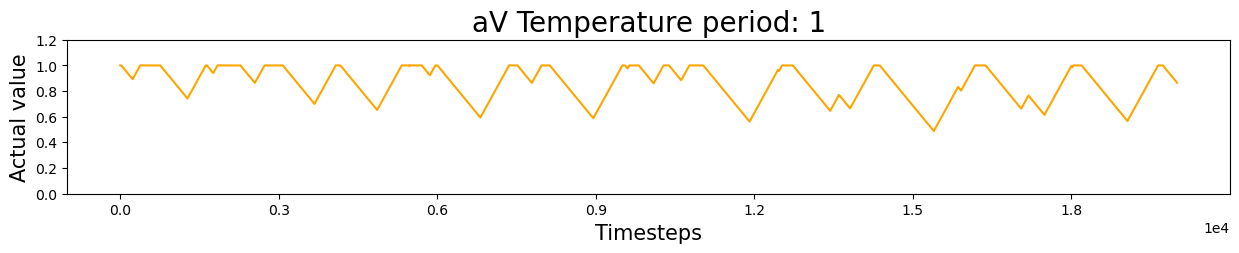

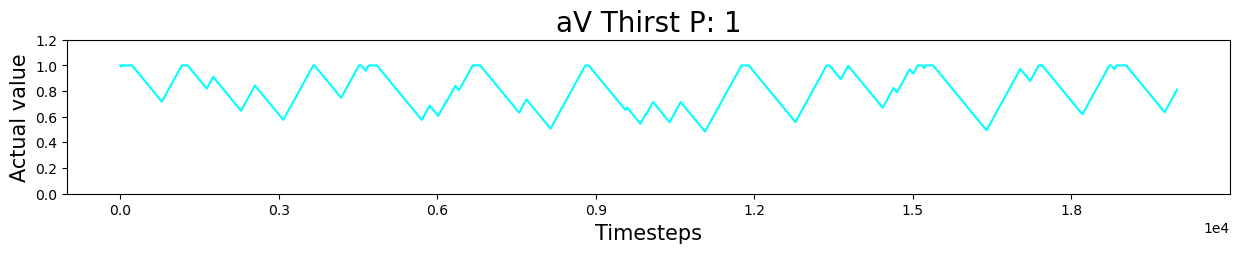

----------------------------------------------------------------------------------------------------------------


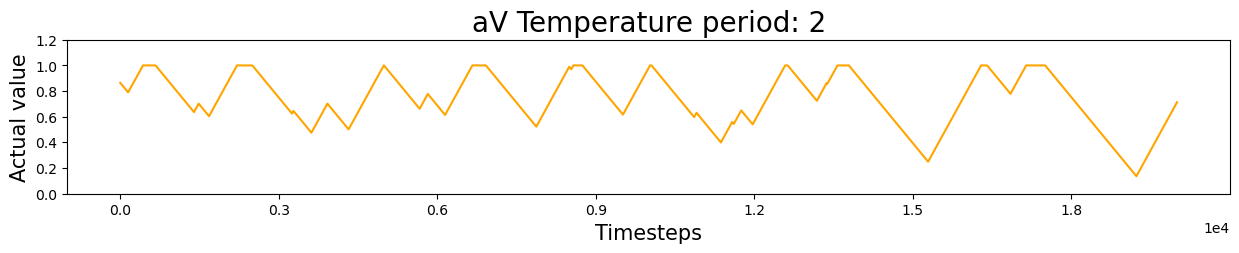

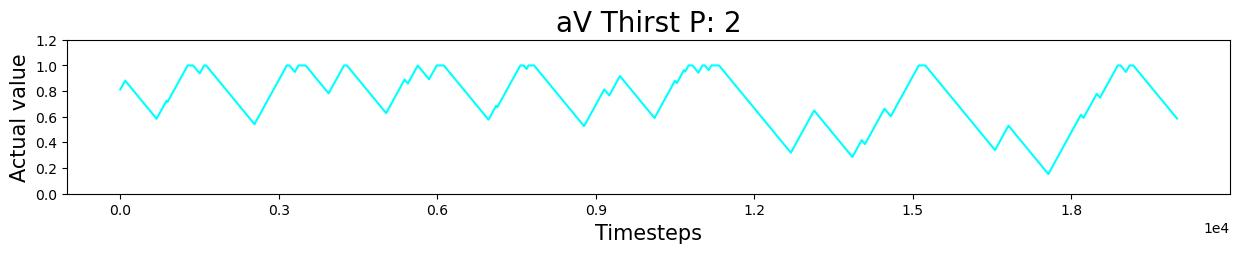

----------------------------------------------------------------------------------------------------------------


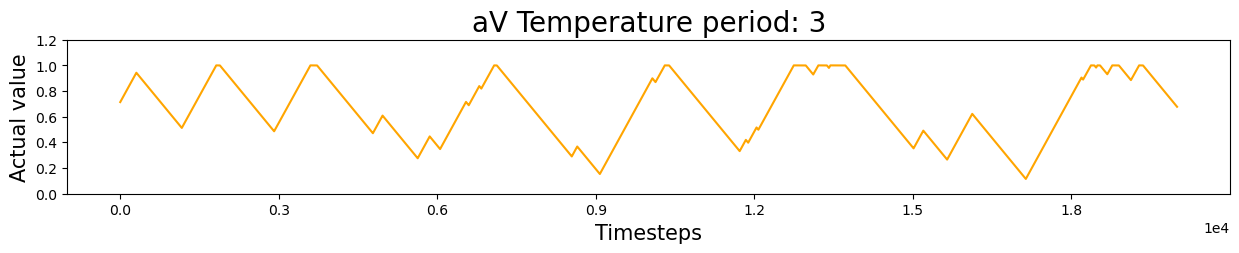

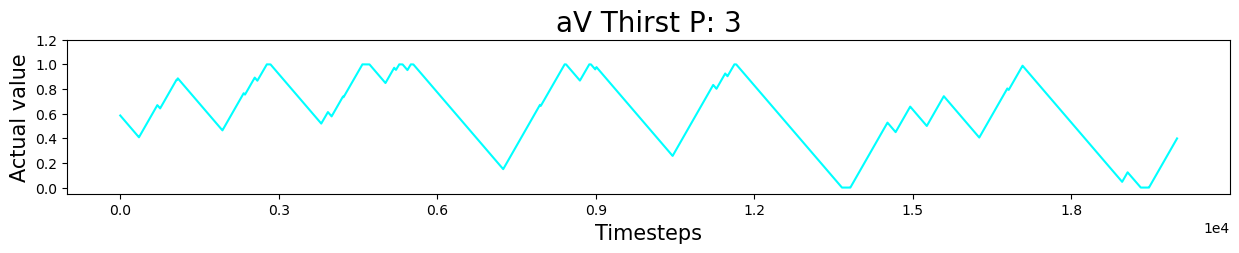

----------------------------------------------------------------------------------------------------------------


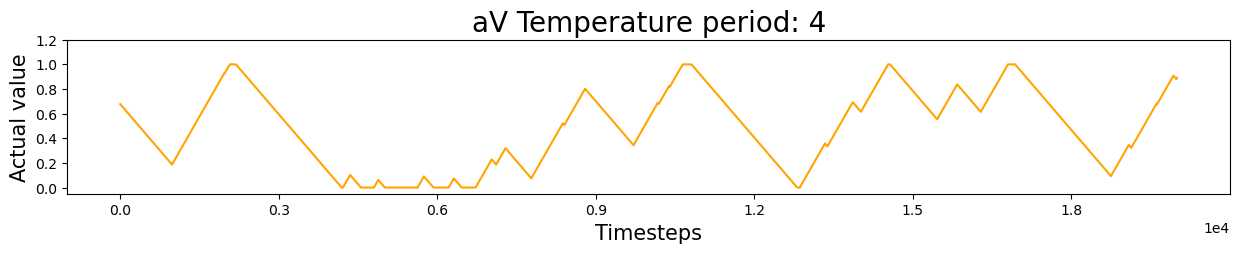

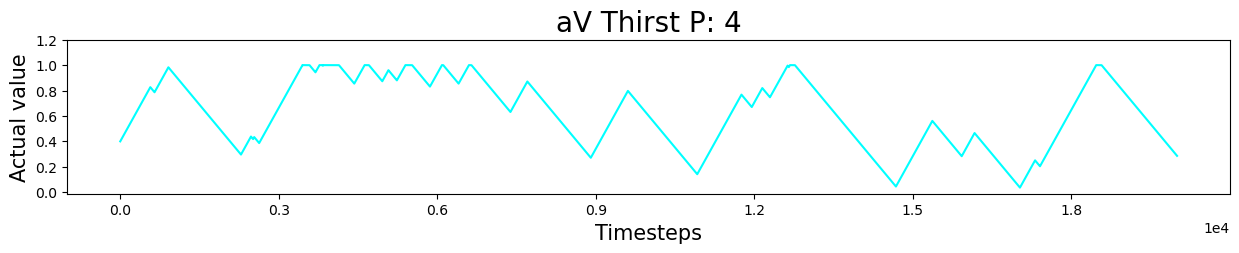

----------------------------------------------------------------------------------------------------------------


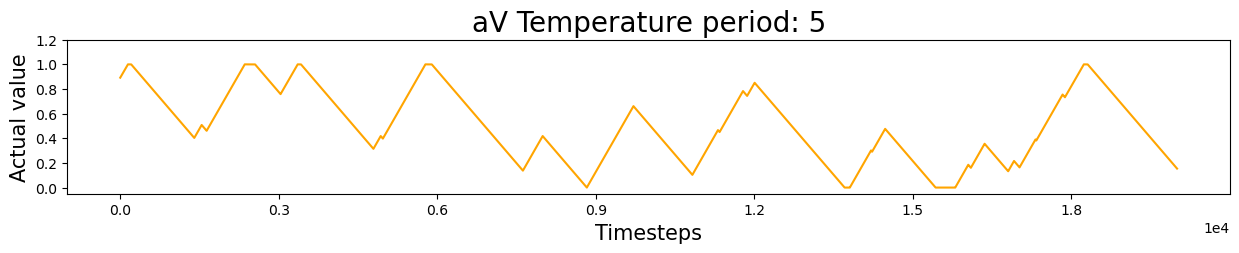

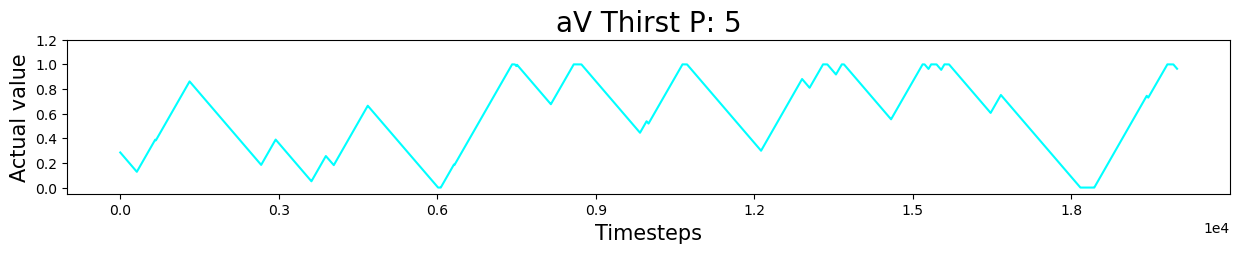

----------------------------------------------------------------------------------------------------------------


In [14]:
for i in range(5):
    steps = round(period_limits[1]/6, -3)
    plt.figure(figsize=(15, 2))
    plt.plot(aV_Temperature[period_limits[i]:period_limits[i+1]],'orange')
    plt.xticks(np.arange(0, len(aV_Temperature[period_limits[i]:period_limits[i+1]]), step=steps))
    plt.ticklabel_format(axis="x", style="sci", scilimits=(0,0))
    plt.yticks(np.arange(0, 1.3, step=0.2))
    plt.title('aV Temperature period: ' + str(i+1), fontsize=20)
    plt.ylabel('Actual value', fontsize=15)
    plt.xlabel('Timesteps', fontsize=15)
    plt.show()
    
    plt.figure(figsize=(15, 2))
    plt.plot(aV_Thirst[period_limits[i]:period_limits[i+1]],'cyan')
    plt.xticks(np.arange(0, len(aV_Thirst[period_limits[i]:period_limits[i+1]]), step=steps))
    plt.ticklabel_format(axis="x", style="sci", scilimits=(0,0))
    plt.yticks(np.arange(0, 1.3, step=0.2))
    plt.title('aV Thirst P: ' + str(i+1), fontsize=20)
    plt.ylabel('Actual value', fontsize=15)
    plt.xlabel('Timesteps', fontsize=15)
    plt.show()
    
    print('----------------------------------------------------------------------------------------------------------------')

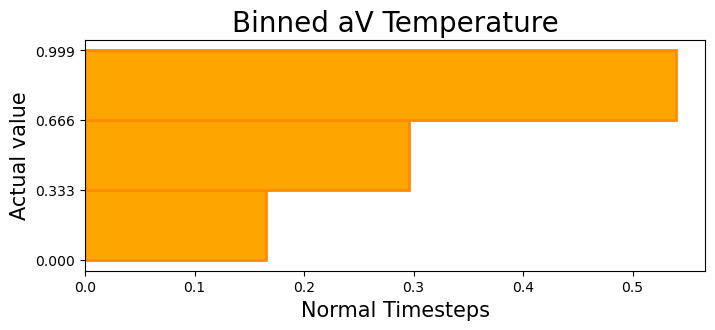

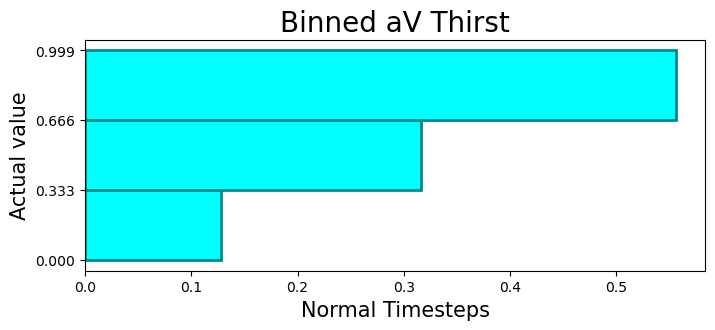

In [15]:
normal = np.ones_like(aV_Temperature)/float(len(aV_Temperature))

plt.figure(figsize=(8, 3))
plt.hist(aV_Temperature, weights=normal, bins=[0,0.3333,0.666,1], color = "orange",edgecolor='darkorange', linewidth=2, orientation='horizontal')
plt.yticks(np.arange(0, 1, step=0.333))
plt.title('Binned aV Temperature', fontsize=20)
plt.xlabel('Normal Timesteps', fontsize=15)
plt.ylabel('Actual value', fontsize=15)
plt.show()

plt.figure(figsize=(8, 3))
plt.hist(aV_Thirst, weights=normal, bins=[0,0.3333,0.666,1], color = "cyan",edgecolor='darkcyan', linewidth=2, orientation='horizontal')
plt.yticks(np.arange(0, 1, step=0.333))
plt.title('Binned aV Thirst', fontsize=20)
plt.xlabel('Normal Timesteps', fontsize=15)
plt.ylabel('Actual value', fontsize=15)
plt.show()

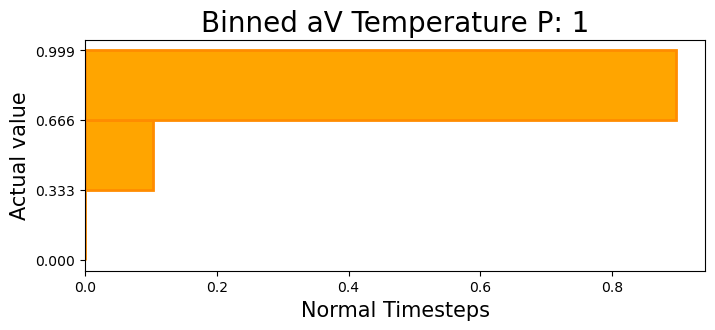

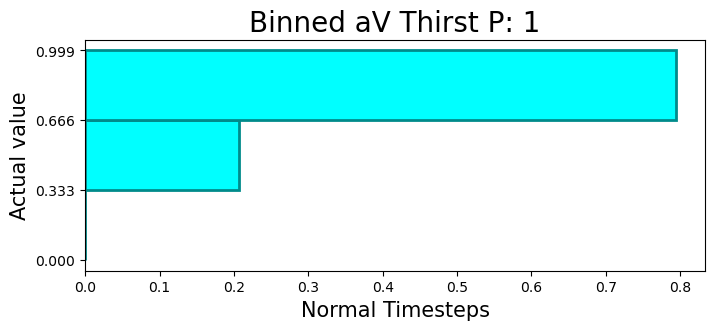

----------------------------------------------------------------------------------------------------------------


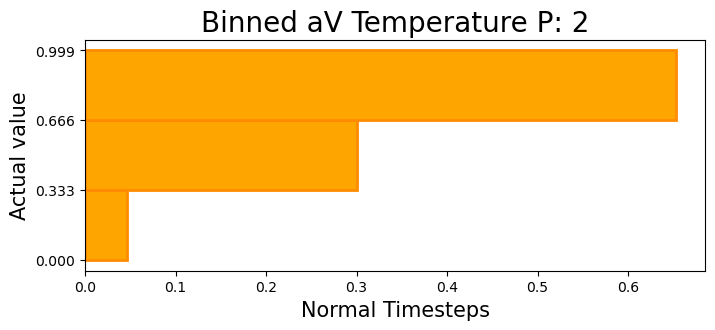

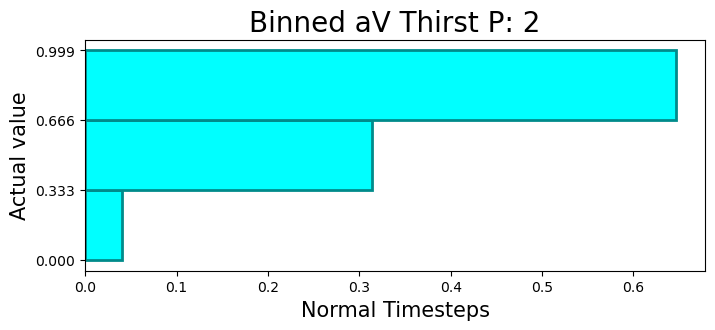

----------------------------------------------------------------------------------------------------------------


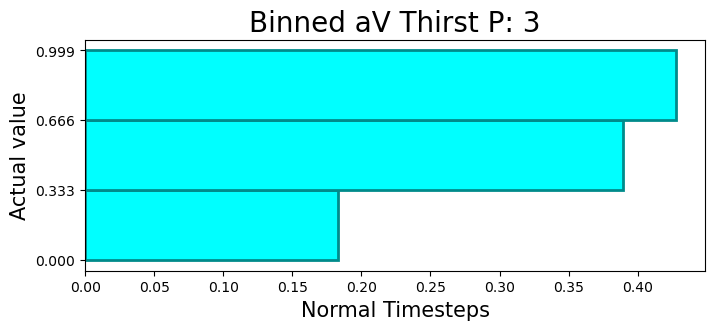

----------------------------------------------------------------------------------------------------------------


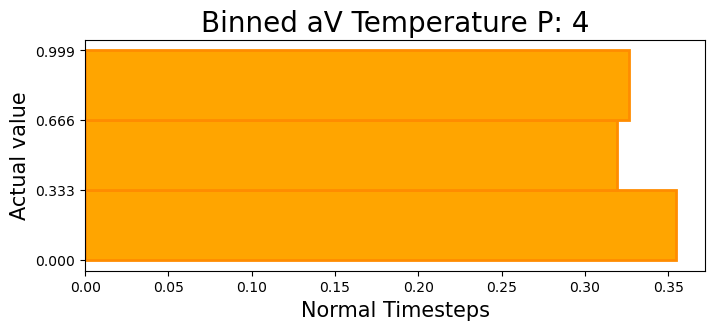

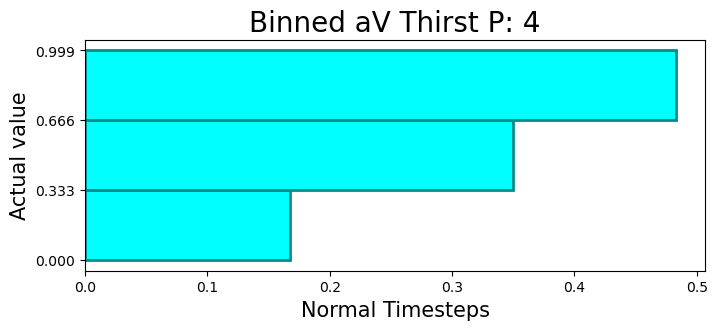

----------------------------------------------------------------------------------------------------------------


----------------------------------------------------------------------------------------------------------------


In [16]:
normal = np.ones_like(aV_Temperature[period_limits[0]:period_limits[1]])/float(len(aV_Temperature[period_limits[0]:period_limits[1]]))

for i in range(5):
    plt.figure(figsize=(8, 3))
    plt.hist(aV_Temperature[period_limits[i]:period_limits[i+1]], weights=normal, bins=[0,0.3333,0.666,1], color = "orange",edgecolor='darkorange', linewidth=2, orientation='horizontal')
    plt.yticks(np.arange(0, 1, step=0.333))
    plt.title('Binned aV Temperature P: ' + str(i+1), fontsize=20)
    plt.xlabel('Normal Timesteps', fontsize=15)
    plt.ylabel('Actual value', fontsize=15)
    plt.show()

    plt.figure(figsize=(8, 3))
    plt.hist(aV_Thirst[period_limits[i]:period_limits[i+1]], weights=normal, bins=[0,0.3333,0.666,1], color = "cyan",edgecolor='darkcyan', linewidth=2, orientation='horizontal')
    plt.yticks(np.arange(0, 1, step=0.333))
    plt.title('Binned aV Thirst P: ' + str(i+1), fontsize=20)
    plt.xlabel('Normal Timesteps', fontsize=15)
    plt.ylabel('Actual value', fontsize=15)
    plt.show()
    
    print('----------------------------------------------------------------------------------------------------------------')

# Attractor dynamics

In [17]:
max_fr=0

if max(TF_Temperature)>max(TF_Thirst):
    max_fr=round(max(TF_Temperature),3)
else:
    max_fr=round(max(TF_Thirst),3)

steps = round(period_limits[1]/2, -3)

plt.figure(figsize=(14, 2))
plt.plot(TF_Temperature, label='Temperature', color="orange")
plt.plot(TF_Thirst, label='Thirst',color='cyan')
plt.xticks(np.arange(0, len(TF_Temperature), step=steps))
plt.ticklabel_format(axis="x", style="sci", scilimits=(0,0))
plt.yticks(np.arange(0, max_fr+0.1, step=0.25))
plt.title('Attractor dynamics', fontsize=20)
plt.ylabel('Firing Rate', fontsize=15)
plt.xlabel('Timesteps', fontsize=15)
plt.legend(loc=1)
plt.show()

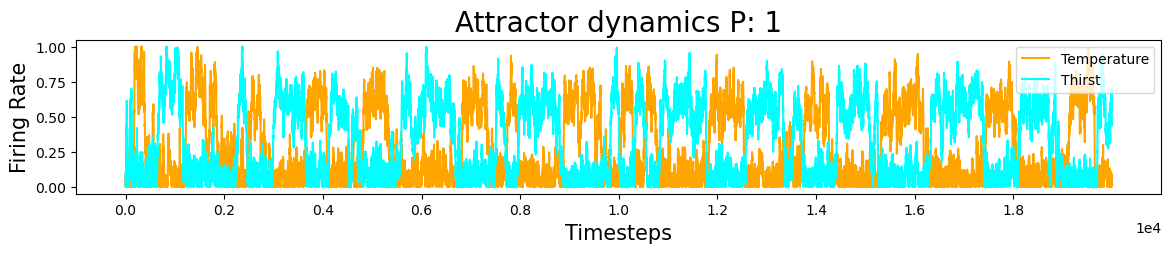

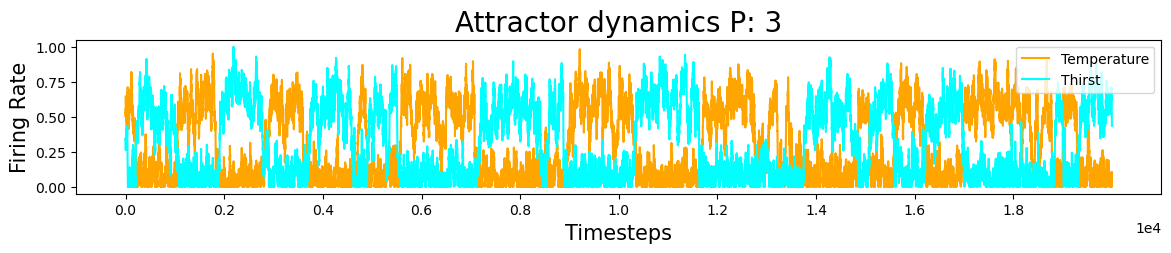

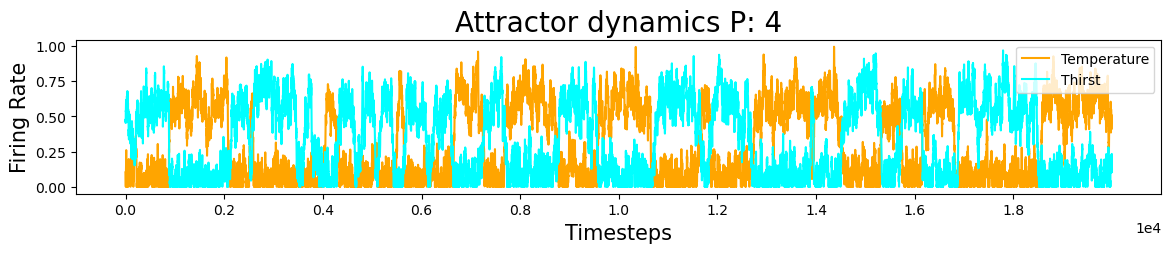

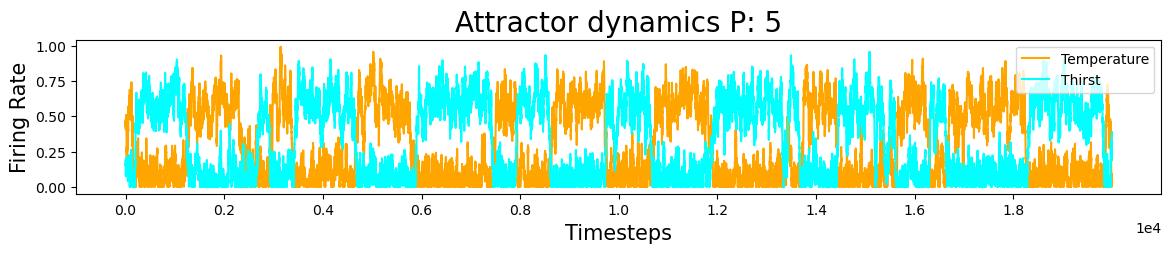

In [18]:
for i in range(5):
    plt.figure(figsize=(14, 2))
    plt.plot(TF_Temperature[period_limits[i]:period_limits[i+1]], label='Temperature', color="orange")
    plt.plot(TF_Thirst[period_limits[i]:period_limits[i+1]], label='Thirst',color='cyan')
    plt.xticks(np.arange(0, len(TF_Temperature[period_limits[0]:period_limits[1]]), step=steps/5))
    plt.ticklabel_format(axis="x", style="sci", scilimits=(0,0))
    plt.yticks(np.arange(0, max_fr+0.1, step=0.25))
    plt.title('Attractor dynamics P: ' + str(i+1), fontsize=20)
    plt.ylabel('Firing Rate', fontsize=15)
    plt.xlabel('Timesteps', fontsize=15)
    plt.legend(loc=1)
    plt.show()

# Attractor switches

In [19]:
switch_n = 0
past_temperature = False
dominance_period = 100


for i in range(len(TF_Temperature)-dominance_period):
    mean_10_temperature = 0
    mean_10_thirst = 0
    ten_temperature = 0
    ten_thirst = 0
    for j in range (dominance_period):
        ten_temperature += TF_Temperature[i+j]
        ten_thirst += TF_Thirst[i+j]
    mean_10_temperature = ten_temperature/10
    mean_10_thirst = ten_thirst/10

    if mean_10_temperature>mean_10_thirst and past_temperature == False:
        switch_n+=1
        past_temperature = True
    if mean_10_temperature>mean_10_thirst and past_temperature == True:
        pass
    if mean_10_temperature<mean_10_thirst and past_temperature == True:
        switch_n+=1
        past_temperature = False
    if mean_10_temperature<mean_10_thirst and past_temperature == False:
        pass

print('Number of switches in attractor = ' + str(switch_n))
print('Considering periods of ' + str(dominance_period) + ' episodes')

Number of switches in attractor = 133
Considering periods of 100 episodes


In [20]:
period_switches = []
for i in range(5):
    TF_Temperature_period = TF_Temperature[period_limits[i]:period_limits[i+1]]
    TF_Thirst_period = TF_Thirst[period_limits[i]:period_limits[i+1]]

    switch_n = 0
    past_temperature = False
    dominance_period = 100

    for i in range(len(TF_Temperature_period)-dominance_period):
        mean_10_temperature = 0
        mean_10_thirst = 0
        ten_temperature = 0
        ten_thirst = 0
        for j in range (dominance_period):
            ten_temperature += TF_Temperature_period[i+j]
            ten_thirst += TF_Thirst_period[i+j]
        mean_10_temperature = ten_temperature/10
        mean_10_thirst = ten_thirst/10

        if mean_10_temperature>mean_10_thirst and past_temperature == False:
            switch_n+=1
            past_temperature = True
        if mean_10_temperature>mean_10_thirst and past_temperature == True:
            pass
        if mean_10_temperature<mean_10_thirst and past_temperature == True:
            switch_n+=1
            past_temperature = False
        if mean_10_temperature<mean_10_thirst and past_temperature == False:
            pass
    period_switches.append(switch_n)
    print('Number of switches in attractor = ' + str(switch_n))
    print('Considering periods of ' + str(dominance_period) + ' episodes')

Number of switches in attractor = 34
Considering periods of 100 episodes
Number of switches in attractor = 25
Considering periods of 100 episodes
Number of switches in attractor = 24
Considering periods of 100 episodes
Number of switches in attractor = 25
Considering periods of 100 episodes
Number of switches in attractor = 27
Considering periods of 100 episodes


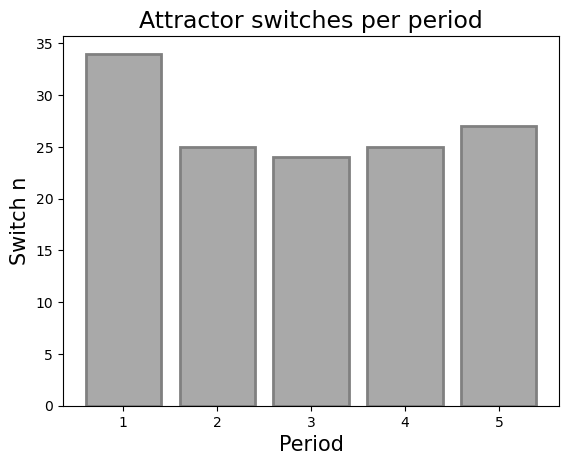

In [21]:
x = [1,2,3,4,5]
plt.title('Attractor switches per period', fontsize=17)
plt.ylabel('Switch n', fontsize=15)
plt.xlabel('Period', fontsize=15)
plt.bar(x, period_switches, color='darkgray',edgecolor='gray', linewidth=2)
plt.show()

# Attractor dominance

53974
45917
99891


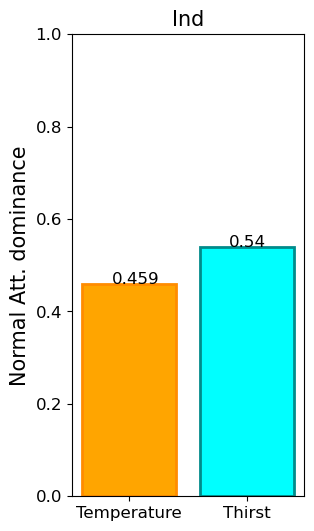

In [22]:
temperature_count = 0
thirst_count = 0


for i in range(len(TF_Temperature)):
    if TF_Temperature[i]>TF_Thirst[i]:
        temperature_count+=1
    if TF_Temperature[i]<TF_Thirst[i]:
        thirst_count+=1
        
print(thirst_count)
print(temperature_count)
print(temperature_count+thirst_count)


norm_aro = temperature_count/len(TF_Temperature)
norm_sec = thirst_count/len(TF_Thirst)


objects = ('Temperature', 'Thirst')
y_pos = np.arange(len(objects))
values = [round(norm_aro, 3), round(norm_sec, 3)]

plt.figure(figsize=(3, 6))
plt.bar(y_pos, values, align='center', color=['orange', 'cyan'], edgecolor=['darkorange', 'darkcyan'], linewidth=2)
plt.xticks(y_pos, objects, fontsize=12)
plt.ylabel('Normal Att. dominance', fontsize=15)
plt.yticks(np.arange(0, 1.1, step=0.2), fontsize=12)
plt.title('Ind', fontsize=15)

for index, value in enumerate(values):
    plt.text(index-0.15, value, str(value), fontsize=12)

plt.show()

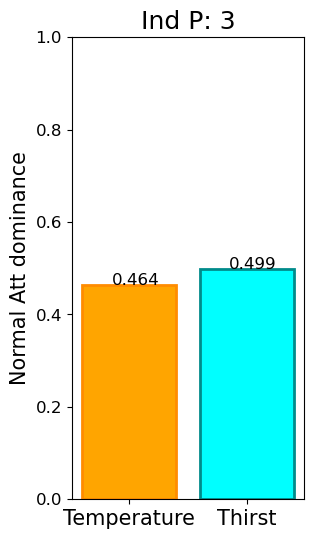

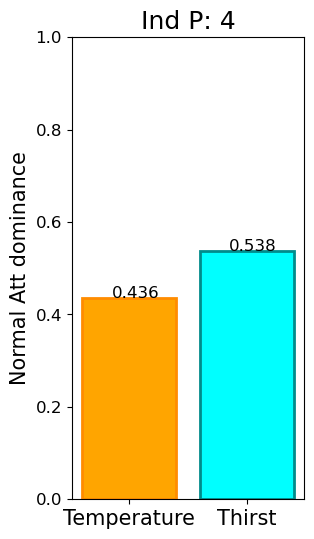

In [23]:
for i in range(5):
    TF_Temperature_period = TF_Temperature[period_limits[i]:period_limits[i+1]]
    TF_Thirst_period = TF_Thirst[period_limits[i]:period_limits[i+1]]
    
    temperature_count = 0
    thirst_count = 0

    for j in range(len(TF_Temperature_period)):
        if TF_Temperature[j]>TF_Thirst_period[j]:
            temperature_count+=1
        if TF_Temperature_period[j]<TF_Thirst_period[j]:
            thirst_count+=1

    norm_aro = temperature_count/len(TF_Temperature_period)
    norm_sec = thirst_count/len(TF_Thirst_period)

    objects = ('Temperature', 'Thirst')
    y_pos = np.arange(len(objects))
    values = [round(norm_aro, 3), round(norm_sec, 3)]

    plt.figure(figsize=(3, 6))
    plt.bar(y_pos, values, align='center', color=['orange', 'cyan'], edgecolor=['darkorange', 'darkcyan'], linewidth=2)
    plt.xticks(y_pos, objects, fontsize=15)
    plt.ylabel('Normal Att dominance', fontsize=15)
    plt.yticks(np.arange(0, 1.1, step=0.2), fontsize=12)
    plt.title('Ind P: ' + str(i+1), fontsize=18)

    for index, value in enumerate(values):
        plt.text(index-0.15, value, str(value), fontsize=12)

    plt.show()

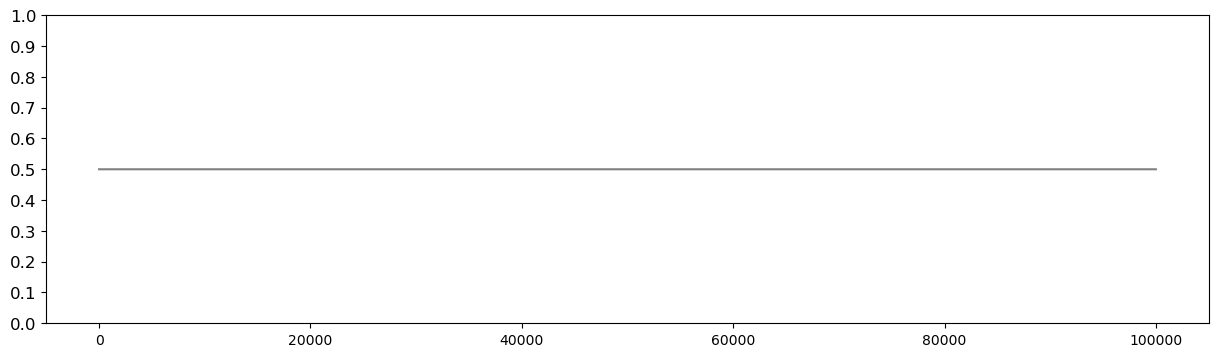

In [24]:
plt.figure(figsize=(15, 4))
plt.plot(attrator_Q,'gray')
plt.yticks(np.arange(0, 1.1, step=0.1), fontsize=12)
plt.show()

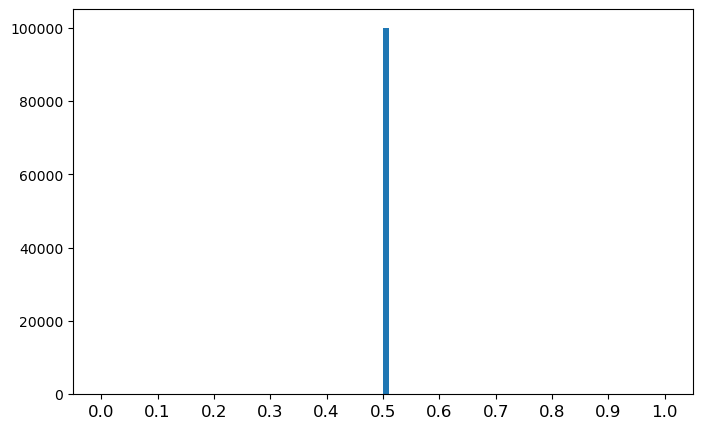

In [25]:
plt.figure(figsize=(8, 5))
plt.hist(attrator_Q, bins=100)
plt.xticks(np.arange(0, 1.1, step=0.1), fontsize=12)
plt.show()